In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from datetime import datetime



In [2]:
!pip install mplchart

# Installing Library for Technical Indicators

In the following lines, we will install the TA-Lib library

In [3]:
import os
os.chdir("/usr")

In [4]:
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz -P /usr
!tar -xzf ta-lib-0.4.0-src.tar.gz

--2023-11-30 22:22:06--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 204.68.111.105
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|204.68.111.105|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2023-11-30 22:22:06--  http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 204.68.111.105
Reusing existing connection to prdownloads.sourceforge.net:80.
HTTP request sent, awaiting response... 302 Found
Location: http://versaweb.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2023-11-30 22:22:06--  http://versaweb.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving versaweb.dl.s

In [5]:
import os
os.chdir('/usr/ta-lib')

In [6]:
!./configure --prefix=/usr
!make
!sudo make install

checking for a BSD-compatible install... /usr/bin/install -c
checking whether build environment is sane... yes
checking for a thread-safe mkdir -p... /usr/bin/mkdir -p
checking for gawk... no
checking for mawk... mawk
checking whether make sets $(MAKE)... yes
checking for gcc... gcc
checking for C compiler default output file name... a.out
checking whether the C compiler works... yes
checking whether we are cross compiling... no
checking for suffix of executables... 
checking for suffix of object files... o
checking whether we are using the GNU C compiler... yes
checking whether gcc accepts -g... yes
checking for gcc option to accept ISO C89... none needed
checking for style of include used by make... GNU
checking dependency style of gcc... gcc3
checking build system type... x86_64-unknown-linux-gnu
checking host system type... x86_64-unknown-linux-gnu
checking for a sed that does not truncate output... /usr/bin/sed
checking for grep that handles long lines and -e... /usr/bin/grep
chec

In [7]:
!pip install TA-Lib

In [8]:
import yfinance as yf
import pandas as pd
import talib as ta
import matplotlib.pyplot as plt


# Download the historical data for the asset
stock = yf.Ticker("WMT")
data = stock.history(period="30y")

# Calculate the simple moving average (SMA)
data["sma_30"] = ta.SMA(data["Open"], timeperiod=30)
data["sma_50"] = ta.SMA(data["Close"], timeperiod=50)
data["sma_200"] = ta.SMA(data["Close"], timeperiod=200)

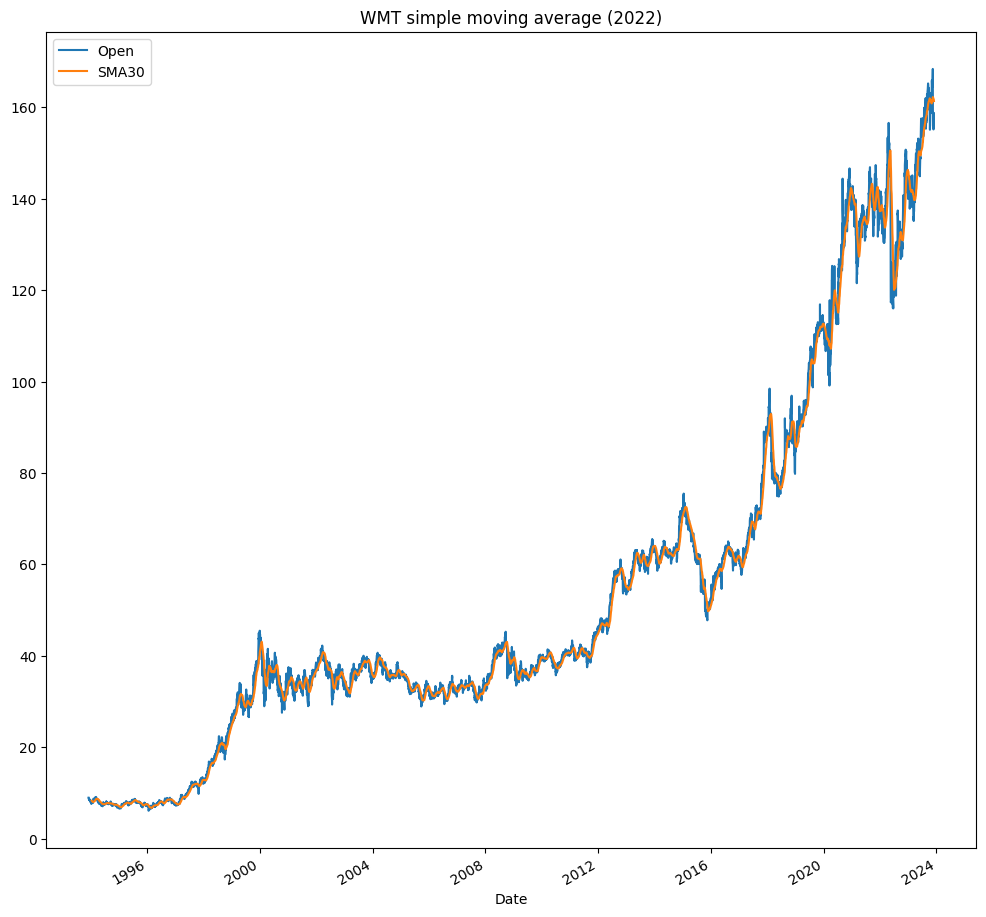

In [9]:
data['SMA30'] = ta.SMA(data['Open'],30)
data[['Open', 'SMA30']].plot(figsize=(12,12))
plt.title("WMT simple moving average (2022)")
plt.show()

In [10]:
data.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,sma_30,sma_50,sma_200,SMA30
Date,,,,,,,,,,,
2023-11-24 00:00:00-05:00,155.149994,156.130005,154.699997,156.059998,4658400,0.0,0.0,161.854000,161.4796,153.608304,161.854000
2023-11-27 00:00:00-05:00,155.949997,157.360001,155.949997,156.770004,7797900,0.0,0.0,161.743667,161.3222,153.692596,161.743667
2023-11-28 00:00:00-05:00,156.660004,158.919998,156.660004,158.639999,7845000,0.0,0.0,161.614334,161.2266,153.775363,161.614334
2023-11-29 00:00:00-05:00,158.770004,158.770004,155.610001,156.080002,9965500,0.0,0.0,161.548667,161.0806,153.834504,161.548667
2023-11-30 00:00:00-05:00,156.020004,156.350006,154.509903,155.690002,9969881,0.0,0.0,161.353334,160.9162,153.893772,161.353334


In [11]:
data['aboveSMA'] = data['Open'] > data['SMA30']
data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,sma_30,sma_50,sma_200,SMA30,aboveSMA
Date,,,,,,,,,,,,
1993-12-01 00:00:00-05:00,8.997190,9.075768,8.800745,8.957901,6475200,0.0,0.0,NaN,NaN,NaN,NaN,False
1993-12-02 00:00:00-05:00,8.800741,8.879319,8.682874,8.761452,5301400,0.0,0.0,NaN,NaN,NaN,NaN,False
1993-12-03 00:00:00-05:00,8.761452,8.840030,8.643585,8.761452,3701600,0.0,0.0,NaN,NaN,NaN,NaN,False
1993-12-06 00:00:00-05:00,8.800743,8.957899,8.761454,8.800743,3463000,0.0,0.0,NaN,NaN,NaN,NaN,False
1993-12-07 00:00:00-05:00,8.840032,8.840032,8.604298,8.682876,3337800,0.0,0.0,NaN,NaN,NaN,NaN,False


Get just first day of every month
  

In [12]:
import pandas as pd

# Convert the index to datetime and name it 'Date'
data.index = pd.to_datetime(data.index).rename('Date')

data.columns


Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits',
       'sma_30', 'sma_50', 'sma_200', 'SMA30', 'aboveSMA'],
      dtype='object')

In [13]:
# Find the first instance of each month
#*sometimes first day of month is holiday and excluded from stock market

first_instance_of_month = data.groupby(data.index.to_period("M")).idxmin()

# Use the found indices to extract the corresponding rows
filtered_data = data.iloc[first_instance_of_month.index]

# Print the result
print(len(filtered_data))
print(filtered_data.tail())

<ipython-input-13-8242eb30ee7d>:4: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  first_instance_of_month = data.groupby(data.index.to_period("M")).idxmin()


360
                               Open      High       Low     Close    Volume  \
Date                                                                          
1996-06-17 00:00:00-04:00  8.328801  8.368843  8.288758  8.288758   3741000   
1996-06-18 00:00:00-04:00  8.248724  8.248724  8.048512  8.088554   6690600   
1996-06-19 00:00:00-04:00  8.088557  8.088557  7.888345  7.888345   5615800   
1996-06-20 00:00:00-04:00  7.928380  8.048507  7.928380  7.968422   7245200   
1996-06-21 00:00:00-04:00  8.048509  8.248721  8.008467  8.208678  15986800   

                           Dividends  Stock Splits    sma_30    sma_50  \
Date                                                                     
1996-06-17 00:00:00-04:00        0.0           0.0  8.035409  7.742288   
1996-06-18 00:00:00-04:00        0.0           0.0  8.055940  7.762593   
1996-06-19 00:00:00-04:00        0.0           0.0  8.072464  7.779692   
1996-06-20 00:00:00-04:00        0.0           0.0  8.087645  7.799193  

# interpret signals and track balances

COMPARING INVESTMENT STRATEGIES
You are tasked with comparing two investment strategies that are described below:

1. Buy and Hold: In this strategy, you invest $1,000 every month into a stock of your
choice and hold the investment till the expiry of the test period (30 years by
default). You do not care whether the market is going up or down but invest
consistently the same fixed amount.

2. Active Trading: In this strategy, you check the market signal before investing. The
strategy can be summarized as:
For every month:
If (technical signal is buy)

Invest $1,000 in the stock market

Else if (technical signal is sell)

Put $1,000 in a savings account with 0% APR i.e. no interest

Further, if the signal ever switches from buy to sell, transfer money to savings
account with 0% APR, and if the signal switches from sell to buy, transfer money
from savings account to the stock market.

You are free to choose your technical signal. One good example is Simple Moving
Average Crossover, which flashes a buy signal if stock price crosses over above
SMA(n), and indicates a sell signal if stock price crosses below the SMA(n).
You are to run a simulation for the past 30 years and report on which strategy gives you
the best returns. You can assume that you start with a zero equity and follow the strategies
mentioned above by checking on your stock on the first trading day of every month.

You should output the following metrics for both strategies:

• The total equity at the end of 30 years
• The annual percent return
• A plot showing the growth of your money using both the strategies

In [14]:
#determine and track signals

filtered_data['Cash Input'] = [10000] + [0] * (len(filtered_data) - 1)
filtered_data['Signal'] = [0] * len(filtered_data)
print(len(filtered_data))

for i in range(len(filtered_data)):
  smaCross = filtered_data['aboveSMA'][i]
  filtered_data['Cash Input'].iloc[i] = filtered_data['Cash Input'].iloc[i - 1] + 1000

  if(smaCross):
    # buy
    #print("buy")
    filtered_data['Signal'].iloc[i] = "Buy"

  elif (not smaCross):
    # sell and go to cash
    #print("sell")
    filtered_data['Signal'].iloc[i] = "Sell"

  else:
    filtered_data['Signal'].iloc[i] = "Stay"

filtered_data.tail()
print(len(filtered_data))


360
360


<ipython-input-14-6d3b903e637f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Cash Input'] = [10000] + [0] * (len(filtered_data) - 1)
<ipython-input-14-6d3b903e637f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Signal'] = [0] * len(filtered_data)
<ipython-input-14-6d3b903e637f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

# Calc values strat 1

In [15]:
#Strategy 1

end_of_period_price = filtered_data['Open'].iloc[-1]

#buy a $1000 of stock = x stocks
#1 stock = $y $1000/$y = x num of stock

# Define a function to calculate the number of stocks bought
def calculate_num_of_stocks(price):
    return 1000 / price

# Apply the function to every row in the DataFrame
filtered_data['Strat 1 num of Stocks bought this month'] = filtered_data['Open'].apply(calculate_num_of_stocks)

# Print the result
filtered_data.tail()


<ipython-input-15-e69cb15b4e65>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Strat 1 num of Stocks bought this month'] = filtered_data['Open'].apply(calculate_num_of_stocks)


,Open,High,Low,Close,Volume,Dividends,Stock Splits,sma_30,sma_50,sma_200,SMA30,aboveSMA,Cash Input,Signal,Strat 1 num of Stocks bought this month
Date,,,,,,,,,,,,,,,
1996-06-17 00:00:00-04:00,8.328801,8.368843,8.288758,8.288758,3741000,0.0,0.0,8.035409,7.742288,7.460727,8.035409,True,356000,Buy,120.065307
1996-06-18 00:00:00-04:00,8.248724,8.248724,8.048512,8.088554,6690600,0.0,0.0,8.055940,7.762593,7.461575,8.055940,True,357000,Buy,121.230875
1996-06-19 00:00:00-04:00,8.088557,8.088557,7.888345,7.888345,5615800,0.0,0.0,8.072464,7.779692,7.461423,8.072464,True,358000,Buy,123.631453
1996-06-20 00:00:00-04:00,7.928380,8.048507,7.928380,7.968422,7245200,0.0,0.0,8.087645,7.799193,7.461870,8.087645,False,359000,Sell,126.129170
1996-06-21 00:00:00-04:00,8.048509,8.248721,8.008467,8.208678,15986800,0.0,0.0,8.101502,7.823498,7.463121,8.101502,False,360000,Sell,124.246616


# Strat 1 answer

In [16]:
#stock added each month plus starting balance of $10000
filtered_data['Strat 1 num of Stocks bought this month'].iloc[0] <- 0
total_num_stocks = sum(filtered_data['Strat 1 num of Stocks bought this month']) + (10000 / filtered_data['Open'].iloc[0])

print("number of stocks owned", total_num_stocks)
print("Sell price after 30 years", total_num_stocks * end_of_period_price)

number of stocks owned 48725.15221565465
Sell price after 30 years 392164.82194000285


# Strat 2

In [17]:
filtered_data['Strat 2 Num Stocks'] = [0] * (len(filtered_data))
filtered_data['Strat 2 Cash Balance'] = [0] * (len(filtered_data))
filtered_data

<ipython-input-17-e225601e09e1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Strat 2 Num Stocks'] = [0] * (len(filtered_data))
<ipython-input-17-e225601e09e1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Strat 2 Cash Balance'] = [0] * (len(filtered_data))


,Open,High,Low,Close,Volume,Dividends,Stock Splits,sma_30,sma_50,sma_200,SMA30,aboveSMA,Cash Input,Signal,Strat 1 num of Stocks bought this month,Strat 2 Num Stocks,Strat 2 Cash Balance
Date,,,,,,,,,,,,,,,,,
1995-01-20 00:00:00-05:00,6.684866,6.843088,6.645311,6.724422,8895000,0.0,0.0,6.934063,7.079376,7.523118,6.934063,False,1000,Sell,149.591628,0,0
1995-01-23 00:00:00-05:00,6.645308,6.882641,6.605753,6.803530,6215400,0.0,0.0,6.919560,7.063823,7.515230,6.919560,False,2000,Sell,150.482112,0,0
1995-01-24 00:00:00-05:00,6.843086,6.882642,6.763975,6.843086,4116000,0.0,0.0,6.920878,7.048271,7.508917,6.920878,False,3000,Sell,146.132895,0,0
1995-01-25 00:00:00-05:00,6.843083,6.961749,6.803528,6.882638,7481200,0.0,0.0,6.919560,7.036668,7.502802,6.919560,False,4000,Sell,146.132962,0,0
1995-01-26 00:00:00-05:00,6.922198,7.001309,6.882643,6.922198,4836400,0.0,0.0,6.915604,7.026647,7.496884,6.915604,True,5000,Buy,144.462779,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1996-06-17 00:00:00-04:00,8.328801,8.368843,8.288758,8.288758,3741000,0.0,0.0,8.035409,7.742288,7.460727,8.035409,True,356000,Buy,120.065307,0,0
1996-06-18 00:00:00-04:00,8.248724,8.248724,8.048512,8.088554,6690600,0.0,0.0,8.055940,7.762593,7.461575,8.055940,True,357000,Buy,121.230875,0,0
1996-06-19 00:00:00-04:00,8.088557,8.088557,7.888345,7.888345,5615800,0.0,0.0,8.072464,7.779692,7.461423,8.072464,True,358000,Buy,123.631453,0,0


In [18]:
for i in range(len(filtered_data)):
  if i == 0: #first buy in or sit
    if filtered_data['Signal'].iloc[i] != 'Buy': #sell or stay signal
      filtered_data['Strat 2 Num Stocks'].iloc[i] = 0
      filtered_data['Strat 2 Cash Balance'].iloc[i] = 10000

    else: #buy
      filtered_data['Strat 2 Num Stocks'].iloc[i] = 10000 / filtered_data['Current Price of Stock'].iloc[i]
      filtered_data['Strat 2 Cash Balance'].iloc[i] = 0

  else: #every month after
    if filtered_data['Signal'].iloc[i] == 'Sell': #sell
      filtered_data['Strat 2 Num Stocks'].iloc[i] = 0
      filtered_data['Strat 2 Cash Balance'].iloc[i] = filtered_data['Open'].iloc[i] * filtered_data['Strat 2 Num Stocks'].iloc[i - 1] + filtered_data['Strat 2 Cash Balance'].iloc[i-1]

    elif filtered_data['Signal'].iloc[i] == 'Buy': #buy
      filtered_data['Strat 2 Num Stocks'].iloc[i] = filtered_data['Strat 2 Cash Balance'].iloc[i - 1] / filtered_data['Open'].iloc[i] + filtered_data['Strat 2 Num Stocks'].iloc[i - 1] + 1000 / filtered_data['Open'].iloc[i]
      filtered_data['Strat 2 Cash Balance'].iloc[i] = 0

    else: # match last signal
      j = i - 1
      while j >= 0 and filtered_data['Signal'].iloc[j] == 'Stay': # find last non stay signal
        j -= 1

      if filtered_data['Signal'].iloc[j] == 'Sell': #previous signal sell
        filtered_data['Strat 2 Num Stocks'].iloc[i] = 0
        filtered_data['Strat 2 Cash Balance'].iloc[i] = filtered_data['Strat 2 Cash Balance'].iloc[i - 1] + 1000

      elif filtered_data['Signal'].iloc[j] == 'Buy': #previous signal buy
        filtered_data['Strat 2 Num Stocks'].iloc[i] = 1000 / filtered_data['Open'].iloc[i] + filtered_data['Strat 2 Num Stocks'].iloc[i - 1]
        filtered_data['Strat 2 Cash Balance'].iloc[i] = 0
      else: # signal j  was stay
        print("failed")

<ipython-input-18-558bbcdd865e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Strat 2 Num Stocks'].iloc[i] = 0
<ipython-input-18-558bbcdd865e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Strat 2 Cash Balance'].iloc[i] = 10000
<ipython-input-18-558bbcdd865e>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Strat 2 Num Stocks'].iloc[i] = 0
<ipython-input-18-558bbcdd865e>:14: SettingWi

In [19]:
print(filtered_data['Strat 2 Num Stocks'].iloc[-1] * filtered_data['Open'].iloc[-1] + filtered_data['Strat 2 Cash Balance'].iloc[-1] )

filtered_data['Strat 1 Num Stocks'] = [0] * (len(filtered_data))
filtered_data['Strat 2 Value'] = [0] * (len(filtered_data))
filtered_data['Strat 1 Value'] = [0] * (len(filtered_data))

for i in range(len(filtered_data)):
  filtered_data['Strat 1 Num Stocks'].iloc[i] = sum(filtered_data['Strat 1 num of Stocks bought this month'].iloc[0:i]) + filtered_data['Strat 1 num of Stocks bought this month'].iloc[i]
  filtered_data['Strat 2 Value'].iloc[i] = filtered_data['Strat 2 Num Stocks'].iloc[i] * filtered_data['Open'].iloc[i] + filtered_data['Strat 2 Cash Balance'].iloc[i]
  filtered_data['Strat 1 Value'].iloc[i] = filtered_data['Strat 1 Num Stocks'].iloc[i] * filtered_data['Open'].iloc[i]

filtered_data


216202.6923325927


<ipython-input-19-7ab51a06def5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Strat 1 Num Stocks'] = [0] * (len(filtered_data))
<ipython-input-19-7ab51a06def5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Strat 2 Value'] = [0] * (len(filtered_data))
<ipython-input-19-7ab51a06def5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

,Open,High,Low,Close,Volume,Dividends,Stock Splits,sma_30,sma_50,sma_200,SMA30,aboveSMA,Cash Input,Signal,Strat 1 num of Stocks bought this month,Strat 2 Num Stocks,Strat 2 Cash Balance,Strat 1 Num Stocks,Strat 2 Value,Strat 1 Value
Date,,,,,,,,,,,,,,,,,,,,
1995-01-20 00:00:00-05:00,6.684866,6.843088,6.645311,6.724422,8895000,0.0,0.0,6.934063,7.079376,7.523118,6.934063,False,1000,Sell,149.591628,0.000000,10000.000000,149.591628,10000.000000,1000.000000
1995-01-23 00:00:00-05:00,6.645308,6.882641,6.605753,6.803530,6215400,0.0,0.0,6.919560,7.063823,7.515230,6.919560,False,2000,Sell,150.482112,0.000000,10000.000000,300.073740,10000.000000,1994.082460
1995-01-24 00:00:00-05:00,6.843086,6.882642,6.763975,6.843086,4116000,0.0,0.0,6.920878,7.048271,7.508917,6.920878,False,3000,Sell,146.132895,0.000000,10000.000000,446.206634,10000.000000,3053.430482
1995-01-25 00:00:00-05:00,6.843083,6.961749,6.803528,6.882638,7481200,0.0,0.0,6.919560,7.036668,7.502802,6.919560,False,4000,Sell,146.132962,0.000000,10000.000000,592.339597,10000.000000,4053.429062
1995-01-26 00:00:00-05:00,6.922198,7.001309,6.882643,6.922198,4836400,0.0,0.0,6.915604,7.026647,7.496884,6.915604,True,5000,Buy,144.462779,1589.090565,0.000000,736.802376,11000.000000,5100.292148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1996-06-17 00:00:00-04:00,8.328801,8.368843,8.288758,8.288758,3741000,0.0,0.0,8.035409,7.742288,7.460727,8.035409,True,356000,Buy,120.065307,27024.603805,0.000000,46733.997821,225082.536075,389238.148553
1996-06-18 00:00:00-04:00,8.248724,8.248724,8.048512,8.088554,6690600,0.0,0.0,8.055940,7.762593,7.461575,8.055940,True,357000,Buy,121.230875,27145.834680,0.000000,46855.228696,223918.491946,386495.838978
1996-06-19 00:00:00-04:00,8.088557,8.088557,7.888345,7.888345,5615800,0.0,0.0,8.072464,7.779692,7.461423,8.072464,True,358000,Buy,123.631453,27269.466133,0.000000,46978.860149,220570.619200,379991.167477


# Perecent Return

In [20]:

# Calculate monthly percent changes
monthly_returns_strat1 = filtered_data['Strat 1 Value'].pct_change()

# Resample to annual frequency and calculate the annual average percent change
annual_returns_1 = monthly_returns_strat1.resample('A').mean()

# Print the result
print("Annual return strategy 1",annual_returns_1.mean())

# Calculate monthly percent changes
monthly_returns_strat2 = filtered_data['Strat 2 Value'].pct_change()

# Resample to annual frequency and calculate the annual average percent change
annual_returns_2 = monthly_returns_strat2.resample('A').mean()

# Print the result
print("Annual return strategy 2",annual_returns_2.mean())


Annual return strategy 1 0.014989077030171223
Annual return strategy 2 0.007516317369299741


# Plot of value

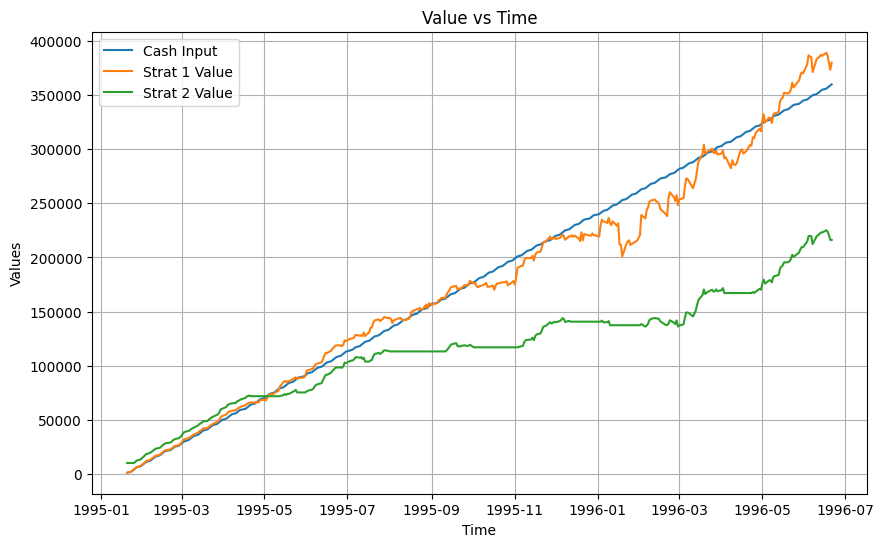

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(filtered_data.index, filtered_data['Cash Input'], label='Cash Input')
plt.plot(filtered_data.index, filtered_data['Strat 1 Value'], label='Strat 1 Value')
plt.plot(filtered_data.index, filtered_data['Strat 2 Value'], label='Strat 2 Value')

plt.title('Value vs Time')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()
